In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
df['enc_sex'] = le.fit_transform(df['sex'])
df['enc_smoker'] = le.fit_transform(df['smoker'])
df['enc_charges'] = le.fit_transform(df['charges'])

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,enc_sex,enc_smoker,enc_charges
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1005
1,18,male,33.770,1,no,southeast,1725.55230,1,0,57
2,28,male,33.000,3,no,southeast,4449.46200,1,0,306
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1097
4,32,male,28.880,0,no,northwest,3866.85520,1,0,254


In [10]:
df.describe()

,age,bmi,children,charges,enc_sex,enc_smoker,enc_charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,667.531390
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,386.338994
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,333.250000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,667.500000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,1001.750000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1336.000000


In [8]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler().
df['sc_charges'] = ss.fit_transform(np.array(df['charges']).reshape(-1, 1))

In [14]:
df[['charges', 'sc_charges']].head()

,charges,sc_charges
0,16884.92400,0.298584
1,1725.55230,-0.953689
2,4449.46200,-0.728675
3,21984.47061,0.719843
4,3866.85520,-0.776802


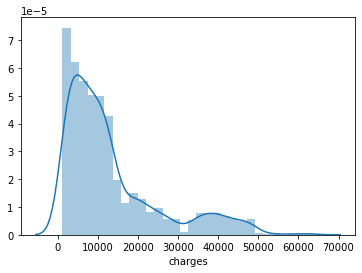

In [15]:
sns.distplot(df['charges'])

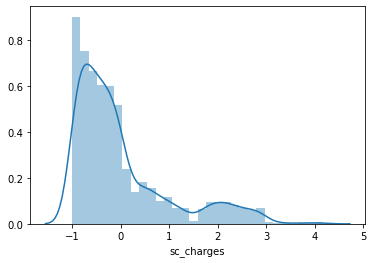

In [16]:
sns.distplot(df['sc_charges'])

In [17]:
df['charges'][:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [18]:
df['sc_charges'][:5]

0    0.298584
1   -0.953689
2   -0.728675
3    0.719843
4   -0.776802
Name: sc_charges, dtype: float64

In [20]:
ss.inverse_transform(df['sc_charges'][:5])

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

In [21]:
#model training for scalled output values

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,enc_sex,enc_smoker,enc_charges,sc_charges
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,1005,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,1,0,57,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,1,0,306,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1097,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,1,0,254,-0.776802


In [25]:
#me being dumb
df['enc_region'] = le.fit_transform(df['region'])
df.drop('enc_charges', axis=1, inplace=True)

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges,enc_sex,enc_smoker,sc_charges,enc_region
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.298584,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,-0.953689,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,-0.728675,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.719843,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,-0.776802,1


In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df[['age', 'bmi', 'children', 'enc_sex', 'enc_smoker',\
                                                            'enc_region']], df['sc_charges'],\
                                                    test_size=0.2, random_state=101)

In [28]:
model1 = LinearRegression().fit(X_train1, y_train1)

In [29]:
y_pred1 = model1.predict(X_test1)

In [30]:
(y_pred1-y_test1).mean()

-0.01766614538789251

In [31]:
np.min(y_pred1)

-1.2533722069674365

In [32]:
y_pred1_transformed = ss.inverse_transform(y_pred1)

In [33]:
y_test1_transformed = ss.inverse_transform(y_test1)

In [35]:
(y_pred1_transformed-y_test1_transformed).mean() # same as non-standardized charges 

-213.85725756921977

In [37]:
# standardizing bmi 

In [39]:
df['sc_bmi'] = ss.fit_transform(np.array(df['bmi']).reshape(-1, 1))

In [41]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[['age', 'sc_bmi', 'children', 'enc_sex', 'enc_smoker',\
                                                            'enc_region']], df['charges'],\
                                                    test_size=0.2, random_state=101)

In [42]:
model2 = LinearRegression().fit(X_train2, y_train2)

In [43]:
y_pred2 = model2.predict(X_test2)

In [46]:
(y_pred2-y_test2).mean() # again, same as non-standardized

-213.8572575692237